In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.model_selection as sk
import sklearn.neighbors as skn
from matplotlib.colors import ListedColormap
%matplotlib inline

Test example:  1/100 | Predicted: 0 | Actual: 138.0 | Match: False
Test example:  2/100 | Predicted: 0 | Actual: 0.0 | Match: True
Test example:  3/100 | Predicted: 0 | Actual: 83.0 | Match: False
Test example:  4/100 | Predicted: 0 | Actual: 0.0 | Match: True
Test example:  5/100 | Predicted: 0 | Actual: 0.0 | Match: True
Test example:  6/100 | Predicted: 0 | Actual: 0.0 | Match: True
Test example:  7/100 | Predicted: 0 | Actual: 83.0 | Match: False
Test example:  8/100 | Predicted: 0 | Actual: 279.0 | Match: False
Test example:  9/100 | Predicted: 0 | Actual: 0.0 | Match: True
Test example: 10/100 | Predicted: 0 | Actual: 0.0 | Match: True
Test example: 11/100 | Predicted: 0 | Actual: 0.0 | Match: True
Test example: 12/100 | Predicted: 0 | Actual: 0.0 | Match: True
Test example: 13/100 | Predicted: 0 | Actual: 1111.0 | Match: False
Test example: 14/100 | Predicted: 0 | Actual: 0.0 | Match: True
Test example: 15/100 | Predicted: 0 | Actual: 63.0 | Match: False
Test example: 16/100 | P

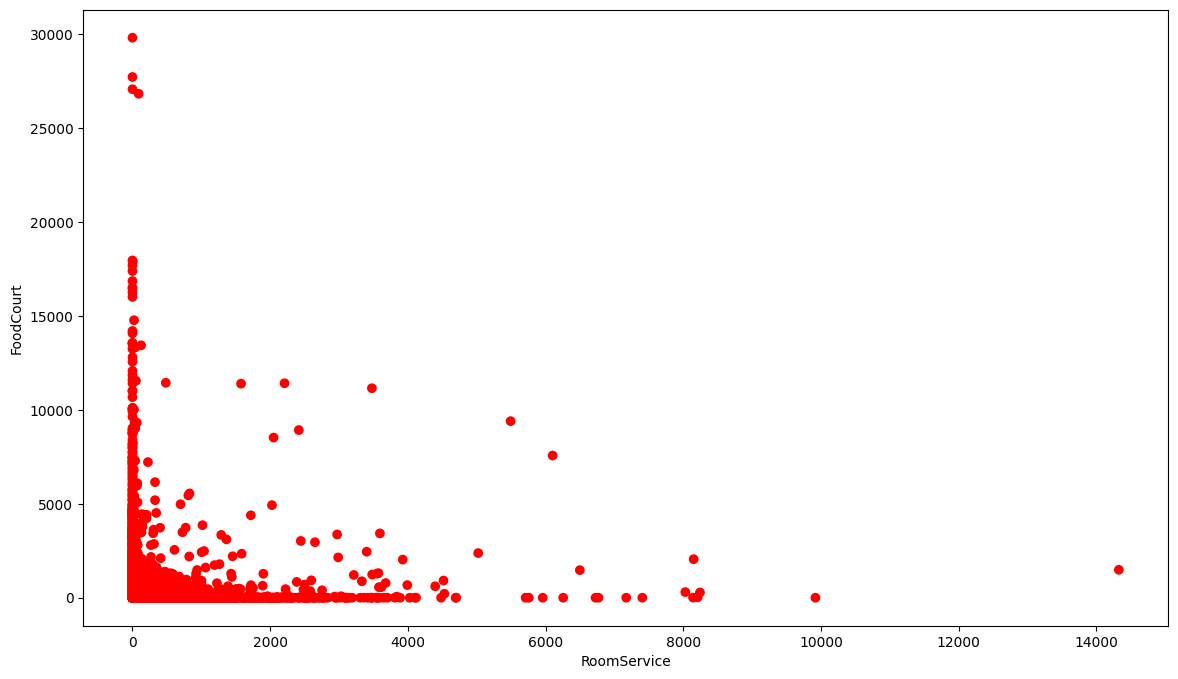

In [ ]:
class KNN:


    def __init__(self, nb_features, nb_classes, data, k, weighted = False):
        self.nb_features = nb_features
        self.nb_classes = nb_classes
        self.k = k
        self.weighted = weighted
        self.X = tf.convert_to_tensor(data['x'], dtype=tf.float32)
        self.Y = tf.convert_to_tensor(data['y'], dtype=tf.int32)

    def predict(self, query_data):

        nb_queries = 100
        matches = 0

        for i in range(nb_queries):

            dists = tf.sqrt(tf.square(tf.subtract(self.X, query_data['x'][i])))
            _, idxs = tf.nn.top_k(-dists, self.k)

            classes = tf.gather(self.Y, idxs)
            dists = tf.gather(dists, idxs)

            if self.weighted:
                w = 1 / dists
            else:
                w = tf.fill([self.k], 1/self.k)

            w_col = tf.reshape(w, (self.k, 1))
            classes_one_hot = tf.one_hot(classes, self.nb_classes)
            scores = tf.reduce_sum(w_col * classes_one_hot, axis=0)

            hyp = tf.argmax(scores)

            if query_data['y'] is not None:
                actual = query_data['y'][i]
                match = (hyp == actual)
                if match:
                    matches += 1
                print(f'Test example: {i+1:2}/{nb_queries} | Predicted: {hyp} | Actual: {actual} | Match: {match}')
          
        accuracy = matches / nb_queries
        print(f'{matches} matches out of {nb_queries} examples')
        print(f'Test set accuracy: {accuracy}')

spaceship = pd.read_csv('spaceship-titanic.csv')

for col in spaceship.columns:
    if spaceship[col].isnull().sum() == 0:
        continue
          
    if spaceship[col].dtype == object or spaceship[col].dtype == bool:
        spaceship[col] = spaceship[col].fillna(spaceship[col].mode()[0])
          
    else:
        spaceship[col] = spaceship[col].fillna(spaceship[col].mean())

spaceship.to_csv('modified-spaceship-titanic.csv', index=False)

filename = 'modified-spaceship-titanic.csv'
all_data = np.loadtxt(filename, delimiter=',', skiprows=1, usecols=(7, 8), dtype='float32')
data = dict()
data['x'] = all_data[:, 0]
data['y'] = all_data[:, 1]

train_x, test_x, train_y, test_y = sk.train_test_split(data['x'], data['y'], test_size=0.33)

nb_features = 2
nb_classes = 5
k = 15
train_data = {'x': train_x, 'y': train_y}
knn = KNN(nb_features, nb_classes, train_data, k, weighted = False)
knn.predict({'x': test_x, 'y': test_y})

fig = plt.figure(1, figsize=(14,8))
cmap = ListedColormap(['red', 'green', 'blue', 'cyan', 'magenta', 'yellow'])
plt.scatter(train_x, train_y, c=[0] * len(train_x), cmap=cmap)

plt.xlabel('RoomService')
plt.ylabel('FoodCourt')
plt.show()

64 matches out of 100 examples
Test set accuracy: 0.64
64 matches out of 100 examples
Test set accuracy: 0.64
65 matches out of 100 examples
Test set accuracy: 0.65
65 matches out of 100 examples
Test set accuracy: 0.65
65 matches out of 100 examples
Test set accuracy: 0.65
65 matches out of 100 examples
Test set accuracy: 0.65
66 matches out of 100 examples
Test set accuracy: 0.66
66 matches out of 100 examples
Test set accuracy: 0.66
66 matches out of 100 examples
Test set accuracy: 0.66
66 matches out of 100 examples
Test set accuracy: 0.66
66 matches out of 100 examples
Test set accuracy: 0.66
66 matches out of 100 examples
Test set accuracy: 0.66
66 matches out of 100 examples
Test set accuracy: 0.66
66 matches out of 100 examples
Test set accuracy: 0.66
66 matches out of 100 examples
Test set accuracy: 0.66
66 matches out of 100 examples
Test set accuracy: 0.66
66 matches out of 100 examples
Test set accuracy: 0.66
66 matches out of 100 examples
Test set accuracy: 0.66
66 matches

Text(0, 0.5, 'Accuracy')

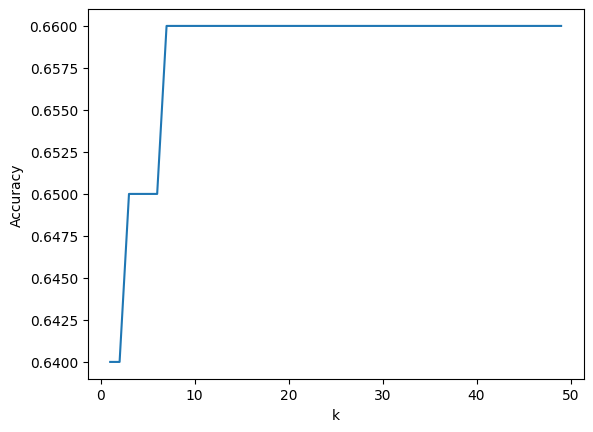

In [ ]:
class KNN:

    def __init__(self, nb_classes, data, k, weighted = False):
        self.nb_classes = nb_classes
        self.k = k
        self.weighted = weighted
        self.X = tf.convert_to_tensor(data['x'], dtype=tf.float32)
        self.Y = tf.convert_to_tensor(data['y'], dtype=tf.int32)

    def predict(self, query_data):

        nb_queries = 100
        matches = 0

        for i in range(nb_queries):

            dists = tf.sqrt(tf.square(tf.subtract(self.X, query_data['x'][i])))
            _, idxs = tf.nn.top_k(-dists, self.k)

            classes = tf.gather(self.Y, idxs)
            dists = tf.gather(dists, idxs)

            if self.weighted:
                w = 1 / dists
            else:
                w = tf.fill([self.k], 1/self.k)

            w_col = tf.reshape(w, (self.k, 1))
            classes_one_hot = tf.one_hot(classes, self.nb_classes)
            scores = tf.reduce_sum(w_col * classes_one_hot, axis=0)

            hyp = tf.argmax(scores)

            if query_data['y'] is not None:
                actual = query_data['y'][i]
                match = (hyp == actual)
                if match:
                    matches += 1
                #print(f'Test example: {i+1:2}/{nb_queries} | Predicted: {hyp} | Actual: {actual} | Match: {match}')
          
        accuracy = matches / nb_queries
        print(f'{matches} matches out of {nb_queries} examples')
        print(f'Test set accuracy: {accuracy}')
        return accuracy

spaceship = pd.read_csv('spaceship-titanic.csv')
modifiedSpaceship = spaceship.fillna(0.0)
#modifiedSpaceship.drop(modifiedSpaceship[modifiedSpaceship['RoomService'] == 0.0].index, inplace = True)
#modifiedSpaceship.drop(modifiedSpaceship[modifiedSpaceship['FoodCourt'] == 0.0].index, inplace = True)
modifiedSpaceship.to_csv('modified-spaceship-titanic.csv', index=False)

filename = 'modified-spaceship-titanic.csv'
all_data = np.loadtxt(filename, delimiter=',', skiprows=1, usecols=(7, 8), dtype='float32')
data = dict()
data['x'] = all_data[:, 0]
data['y'] = all_data[:, 1]

train_x, test_x, train_y, test_y = sk.train_test_split(data['x'], data['y'], test_size=0.33)

nb_classes = 5
train_data = {'x': train_x, 'y': train_y}
acc = []

for k in range(1, 50):
    knn = KNN(nb_classes, train_data, k, weighted = False)
    acc.append(knn.predict({'x': test_x, 'y': test_y}))

plt.plot(range(1, 50), acc)
plt.xlabel('k')
plt.ylabel('Accuracy')

#k krece da daje optimalni accuracy u vrednostima izmedju 5 i 10

In [ ]:
class KNN:

    def __init__(self, nb_classes, data, k, weighted = False):
        self.nb_classes = nb_classes
        self.k = k
        self.weighted = weighted
        self.X = tf.convert_to_tensor(data['x'], dtype=tf.float32)
        self.Y = tf.convert_to_tensor(data['y'], dtype=tf.int32)

    def predict(self, query_data):

        nb_queries = 100
        matches = 0

        for i in range(nb_queries):

            dists = tf.sqrt(tf.square(tf.subtract(self.X, query_data['x'][i])))
            _, idxs = tf.nn.top_k(-dists, self.k)

            classes = tf.gather(self.Y, idxs)
            dists = tf.gather(dists, idxs)

            if self.weighted:
                w = 1 / dists
            else:
                w = tf.fill([self.k], 1/self.k)

            w_col = tf.reshape(w, (self.k, 1))
            classes_one_hot = tf.one_hot(classes, self.nb_classes)
            scores = tf.reduce_sum(w_col * classes_one_hot, axis=0)

            hyp = tf.argmax(scores)

            if query_data['y'] is not None:
                actual = query_data['y'][i]
                match = (hyp == actual)
                if match:
                    matches += 1
                #print(f'Test example: {i+1:2}/{nb_queries} | Predicted: {hyp} | Actual: {actual} | Match: {match}')
          
        accuracy = matches / nb_queries
        print(f'{matches} matches out of {nb_queries} examples')
        print(f'Test set accuracy: {accuracy}')
        return accuracy

spaceship = pd.read_csv('spaceship-titanic.csv')
modifiedSpaceship = spaceship.fillna(0.0)
#modifiedSpaceship.drop(modifiedSpaceship[modifiedSpaceship['RoomService'] == 0.0].index, inplace = True)
#modifiedSpaceship.drop(modifiedSpaceship[modifiedSpaceship['FoodCourt'] == 0.0].index, inplace = True)
modifiedSpaceship.to_csv('modified-spaceship-titanic.csv', index=False)

filename = 'modified-spaceship-titanic.csv'
all_data = np.loadtxt(filename, delimiter=',', skiprows=1, usecols=(0,13), dtype='object_')
data = dict()
data['x'] = all_data[:, 0]
data['y'] = all_data[:, 1]

train_x, test_x, train_y, test_y = sk.train_test_split(data['x'], data['y'], test_size=0.33)

nb_classes = 5
train_data = {'x': train_x, 'y': train_y}
acc = []

for k in range(1, 50):
    knn = KNN(nb_classes, train_data, k, weighted = False)
    acc.append(knn.predict({'x': test_x, 'y': test_y}))

plt.plot(range(1, 50), acc)
plt.xlabel('k')
plt.ylabel('Accuracy')


ValueError: ignored